In [21]:
import cdms2 as cdms
import numpy as np
import MV2 as MV
import genutil,cdutil,cdtime
import glob,sys
sys.path.append("/Users/kmarvel/Google\ Drive/python-utils")
import Plotting

In [47]:
### Set classic Netcdf (ver 3)
cdms.setNetcdfShuffleFlag(0)
cdms.setNetcdfDeflateFlag(0)
cdms.setNetcdfDeflateLevelFlag(0)

In [5]:
data_dir = '/Users/kmarvel/Documents/DATA/LGM/FromMary/'
variables=[x.split("/")[-1] for x in glob.glob(data_dir+"*")]
variables

['rlut', 'rsut', 'rlutcs', 'rsutcs', 'ts']

# Plot selected variables

(12, 143, 144)


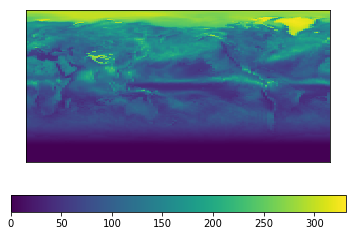

In [83]:
variable="rsut"
allfiles=glob.glob(data_dir+variable+"/IPSL-CM6A-LR/*")
file=allfiles[0]
year=float(file.split(".")[-2])
#Sanity Check
f=cdms.open(file)
data=f(variable)
print(data.shape)
plt.figure()
m=Plotting.bmap(data[6],projection='cyl')
cbar=plt.colorbar(orientation="horizontal")

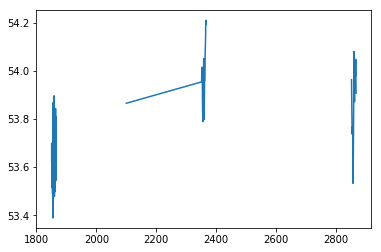

In [80]:
variable="rsutcs"
allfiles=sorted(glob.glob(data_dir+variable+"/IPSL-CM6A-LR/*"))
L=len(allfiles)
globalmean=np.ma.zeros(L)+1.e20
years=[]
i=0
for file in allfiles:
    year=float(file.split(".")[-2])
    years+=[year]
    try:
        f=cdms.open(file)
        data=f(variable)
    
        avg=MV.average(cdutil.averager(data,axis='xy'))
        globalmean[i]=avg
        f.close()
    except:
        print("problem with ",file)
    
    i+=1
    
globalmean=globalmean[np.argsort(years)]
years=np.sort(years)

globalmean=MV.masked_where(np.abs(globalmean)>1.e10,globalmean)
tax=cdms.createAxis(years)
tax.designateTime()
tax.id="time"
tax.units='years since 0001-1-1'
globalmean.setAxis(0,tax)
globalmean.id=variable
Plotting.time_plot(globalmean)

writedir="/Users/kmarvel/Documents/DATA/LGM/GlobalMeans/"
fw=cdms.open(writedir+variable+"_globalmean.nc","w")
fw.write(globalmean)
fw.close()

In [81]:
check_var="rsutcs"
f=cdms.open("/Users/kmarvel/Documents/DATA/LGM/GlobalMeans/"+check_var+"_globalmean.nc")
check_data=f(check_var)
#check_data.getTime().asComponentTime()
print(float(MV.average(check_data(time=('1850-1-1','2000-1-1')))))
print(float(MV.average(check_data(time=('2300-1-1','2400-1-1')))))
print(float(MV.average(check_data(time=('2800-1-1','3000-1-1')))))

53.65166836346519
53.97321685168066
53.87068492573725


HERE IS THE VARIABLE  rlut
problem with  /Users/kmarvel/Documents/DATA/LGM/FromMary/rlut/IPSL-CM6A-LR/rlut.piControl.IPSL-CM6A-LR.r1i1p1f1.1859.nc


/Users/kmarvel/anaconda2/envs/cdatpy3/lib/python3.6/site-packages/numpy/ma/core.py:3206: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  mout = _mask[indx]


HERE IS THE VARIABLE  rsut
problem with  /Users/kmarvel/Documents/DATA/LGM/FromMary/rsut/IPSL-CM6A-LR/rsut.piControl.IPSL-CM6A-LR.r1i1p1f1.2080.nc
problem with  /Users/kmarvel/Documents/DATA/LGM/FromMary/rsut/IPSL-CM6A-LR/rsut.piControl.IPSL-CM6A-LR.r1i1p1f1.3006.nc
HERE IS THE VARIABLE  rlutcs
problem with  /Users/kmarvel/Documents/DATA/LGM/FromMary/rlutcs/IPSL-CM6A-LR/rlutcs.piControl.IPSL-CM6A-LR.r1i1p1f1.2861.nc
HERE IS THE VARIABLE  rsutcs
HERE IS THE VARIABLE  ts
problem with  /Users/kmarvel/Documents/DATA/LGM/FromMary/ts/IPSL-CM6A-LR/ts.piControl.IPSL-CM6A-LR.r1i1p1f1.1854.nc
problem with  /Users/kmarvel/Documents/DATA/LGM/FromMary/ts/IPSL-CM6A-LR/ts.piControl.IPSL-CM6A-LR.r1i2p1f1.1850.nc
problem with  /Users/kmarvel/Documents/DATA/LGM/FromMary/ts/IPSL-CM6A-LR/ts.piControl.IPSL-CM6A-LR.r1i2p1f1.1851.nc
problem with  /Users/kmarvel/Documents/DATA/LGM/FromMary/ts/IPSL-CM6A-LR/ts.piControl.IPSL-CM6A-LR.r1i2p1f1.1852.nc
problem with  /Users/kmarvel/Documents/DATA/LGM/FromMary/ts/IP

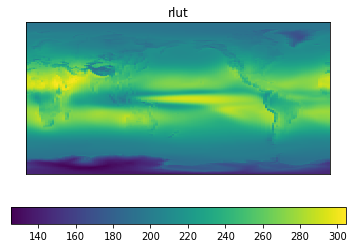

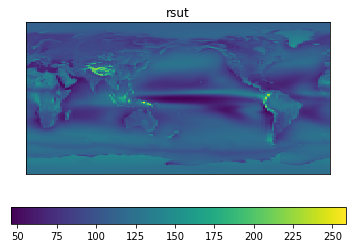

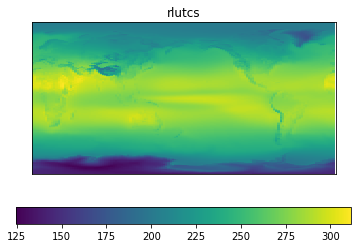

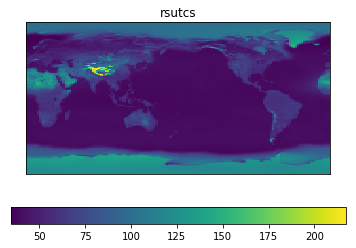

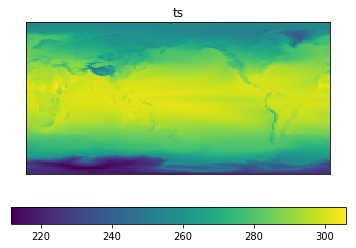

In [103]:
data_dir = '/Users/kmarvel/Documents/DATA/LGM/FromMary/'
variables=[x.split("/")[-1] for x in glob.glob(data_dir+"*")]
variables
for variable in variables:
    print ("HERE IS THE VARIABLE ",variable)
    allfiles=sorted(glob.glob(data_dir+variable+"/IPSL-CM6A-LR/*"))
    L=len(allfiles)
    alldata=np.ma.zeros((L,143,144))+1.e20
    years=[]
    i=0
    for file in allfiles:
        year=float(file.split(".")[-2])
        years+=[year]
        try:
            f=cdms.open(file)
            data=f(variable)

            if i==0:
                axlist=[data.getLatitude(),data.getLongitude()]
            alldata[i]=MV.average(data,axis=0)
            f.close()
        except:
            print("problem with ",file)

        i+=1

    alldata=alldata[np.argsort(years)]
    years=np.sort(years)

    alldata=MV.masked_where(np.abs(alldata)>1.e10,alldata)
    themean=MV.average(alldata,axis=0)
    themean.setAxisList(axlist)
    themean.id=variable
    plt.figure()
    m=Plotting.bmap(themean,projection="cyl")
    cbar=plt.colorbar(orientation="horizontal")
    plt.title(variable)

    writedir="/Users/kmarvel/Documents/DATA/LGM/TimeMeans/"
    fw=cdms.open(writedir+variable+"_timemean.nc","w")
    fw.write(themean)
    fw.close()

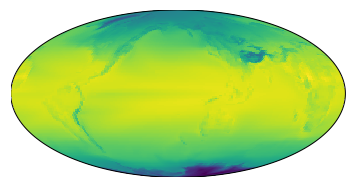

In [104]:
check_var="ts"
f=cdms.open("/Users/kmarvel/Documents/DATA/LGM/TimeMeans/"+check_var+"_timemean.nc")
f.variables
check_data=f(check_var)
plt.figure()
Plotting.bmap(check_data)